


1. Load the Dataset

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 
df = pd.read_csv("student_stress.csv") 
df

,Student_ID,Age,Gender,Study_Hours,Sleep_Hours,Heart_Rate,Blood_Pressure,Anxiety_Level,Depression_Level,Stress_Score,Expenses_USD
0,1,20,F,6,7.0,75,120/80,3,2,45,200.0
1,2,22,M,8,6.0,88,135/90,6,4,70,250.0
2,3,19,F,5,NaN,95,140/95,8,7,85,180.0
3,4,21,M,7,8.0,72,118/79,2,2,35,210.0
4,5,23,F,9,4.0,200,145/92,9,8,90,300.0
5,6,20,M,4,6.0,80,125/85,5,4,60,220.0
6,7,22,F,10,5.0,92,138/88,7,6,78,NaN
7,8,21,M,3,7.0,68,115/75,2,1,30,190.0
8,9,19,F,6,6.0,85,130/85,6,5,65,230.0
9,10,20,M,7,7.0,76,121/81,4,3,50,240.0


2. Data Cleaning

In [12]:
def clean_data(data):
    # Handle missing values
    data = data.fillna(data.mean(numeric_only=True))

    # Handle erroneous data
    # heart rates (<50 or >150)
    median_hr = data["Heart_Rate"].median()
    data.loc[(data["Heart_Rate"] < 50) | (data["Heart_Rate"] > 150), "Heart_Rate"] = median_hr

    return data

df = clean_data(df)
df


,Student_ID,Age,Gender,Study_Hours,Sleep_Hours,Heart_Rate,Blood_Pressure,Anxiety_Level,Depression_Level,Stress_Score,Expenses_USD
0,1,20,F,6,7.0,75,120/80,3,2,45,200.000000
1,2,22,M,8,6.0,88,135/90,6,4,70,250.000000
2,3,19,F,5,6.0,95,140/95,8,7,85,180.000000
3,4,21,M,7,8.0,72,118/79,2,2,35,210.000000
4,5,23,F,9,4.0,84,145/92,9,8,90,300.000000
5,6,20,M,4,6.0,80,125/85,5,4,60,220.000000
6,7,22,F,10,5.0,92,138/88,7,6,78,239.473684
7,8,21,M,3,7.0,68,115/75,2,1,30,190.000000
8,9,19,F,6,6.0,85,130/85,6,5,65,230.000000
9,10,20,M,7,7.0,76,121/81,4,3,50,240.000000


3. Data Integration

In [13]:
extra_data = pd.DataFrame({
    "Student_ID": [1,2,3,4,5,6,7,8,9,10],
    "Club": ["Sports","Music","Drama","Sports","Dance","Music","Drama","Dance","Sports","Music"],
    "Scholarship": [1,0,0,1,1,0,0,1,0,1]
})

def integrate_data(d1, d2):
    return pd.merge(d1, d2, on="Student_ID", how="left")

df = integrate_data(df, extra_data)
print("\nAfter Integration:\n", df.head())


After Integration:
    Student_ID  Age Gender  Study_Hours  Sleep_Hours  Heart_Rate  \
0           1   20      F            6          7.0          75   
1           2   22      M            8          6.0          88   
2           3   19      F            5          6.0          95   
3           4   21      M            7          8.0          72   
4           5   23      F            9          4.0          84   

  Blood_Pressure  Anxiety_Level  Depression_Level  Stress_Score  Expenses_USD  \
0         120/80              3                 2            45         200.0   
1         135/90              6                 4            70         250.0   
2         140/95              8                 7            85         180.0   
3         118/79              2                 2            35         210.0   
4         145/92              9                 8            90         300.0   

     Club  Scholarship  
0  Sports          1.0  
1   Music          0.0  
2   Drama     

4. Data Transformation

In [ ]:
def transform_currency(data, rate=0.9):
    data["Expenses_EUR"] = data["Expenses_USD"] * rate
    return data

df = transform_currency(df)
print("\nAfter Transformation:\n", df[["Expenses_USD","Expenses_EUR"]].head())


After Transformation:
    Expenses_USD  Expenses_EUR
0         200.0         180.0
1         250.0         225.0
2         180.0         162.0
3         210.0         189.0
4         300.0         270.0


5. Data Reduction

In [14]:
from sklearn.decomposition import PCA

def reduce_data(data):
    numeric = data.select_dtypes(include=np.number)
    numeric = numeric.fillna(numeric.mean())

    # Apply PCA on numeric column data
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(numeric)

    return reduced, pca.explained_variance_ratio_
reduced, variance = reduce_data(df)
print("\nPCA Reduced Shape:", reduced.shape)
print("Explained Variance Ratio:", variance)



PCA Reduced Shape: (20, 2)
Explained Variance Ratio: [0.89856899 0.08680704]


6. Data Splitting

In [ ]:
def split_data(data):
    return train_test_split(data, test_size=0.2, random_state=42)

train, test = split_data(df)
print("\nTrain Shape:", train.shape)
print("Test Shape:", test.shape)


Train Shape: (16, 14)
Test Shape: (4, 14)


7. Data Visualization

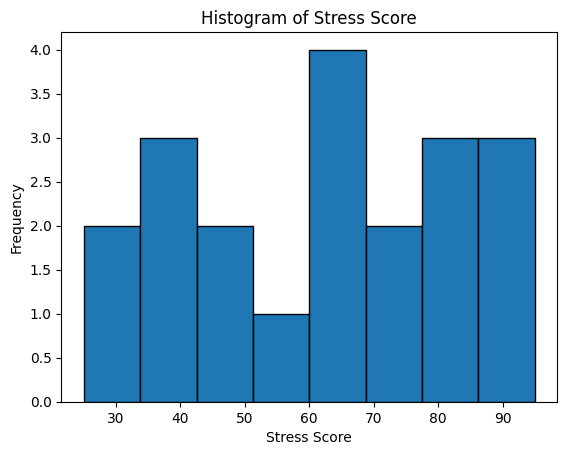

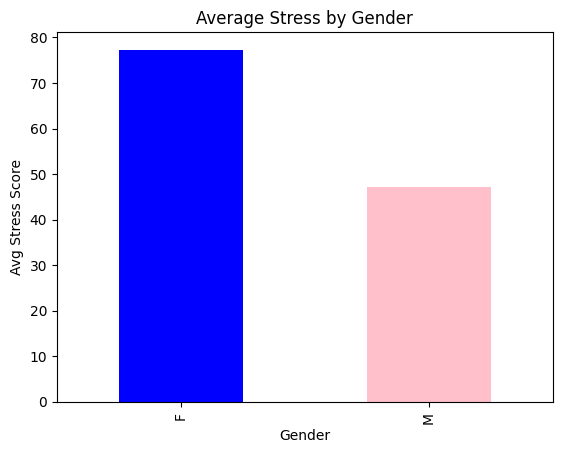

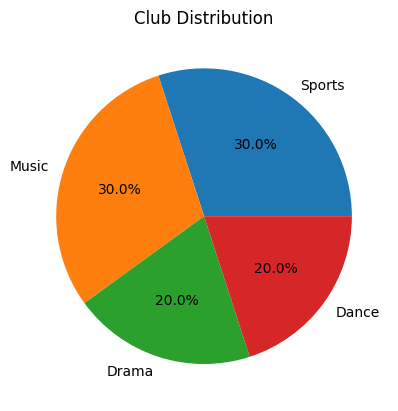

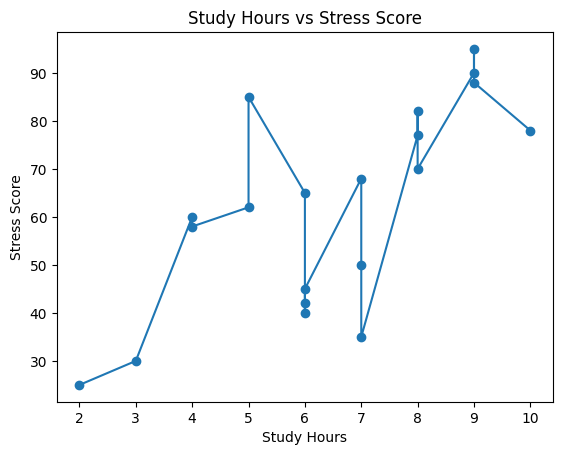

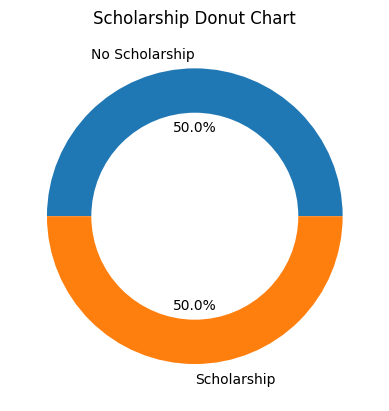

In [ ]:
def visualize_data(data):
    # Histogram of Stress Score
    plt.hist(data["Stress_Score"], bins=8, edgecolor="black")
    plt.title("Histogram of Stress Score")
    plt.xlabel("Stress Score")
    plt.ylabel("Frequency")
    plt.show()

    # Bar Graph (Avg Stress by Gender)
    avg_stress = data.groupby("Gender")["Stress_Score"].mean()
    avg_stress.plot(kind="bar", color=["blue","pink"])
    plt.title("Average Stress by Gender")
    plt.ylabel("Avg Stress Score")
    plt.show()

    # Pie Chart (Club Distribution)
    if "Club" in data.columns:
        club_counts = data["Club"].value_counts()
        plt.pie(club_counts, labels=club_counts.index, autopct="%1.1f%%")
        plt.title("Club Distribution")
        plt.show()

    # Line Graph (Study Hours vs Stress Score sorted)
    sorted_data = data.sort_values("Study_Hours")
    plt.plot(sorted_data["Study_Hours"], sorted_data["Stress_Score"], marker="o")
    plt.title("Study Hours vs Stress Score")
    plt.xlabel("Study Hours")
    plt.ylabel("Stress Score")
    plt.show()

    # Donut Chart (Scholarship Distribution)
    if "Scholarship" in data.columns:
        sch_counts = data["Scholarship"].value_counts()
        plt.pie(sch_counts, labels=["No Scholarship","Scholarship"], autopct="%1.1f%%", wedgeprops=dict(width=0.3))
        plt.title("Scholarship Donut Chart")
        plt.show()

visualize_data(df)